In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blueberry_df = pd.read_csv(r'C:\Kaggle\train.csv')
blueberry_df

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


<Figure size 1000x1000 with 0 Axes>

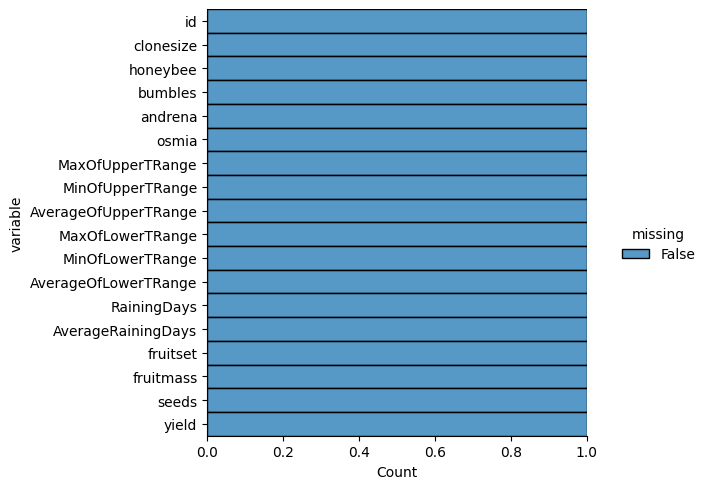

In [3]:
plt.figure(figsize=(10, 10))
sns.displot(data=blueberry_df.isna().melt(value_name='missing'),
             y='variable', hue='missing', multiple='fill', aspect=1.25)


<Axes: >

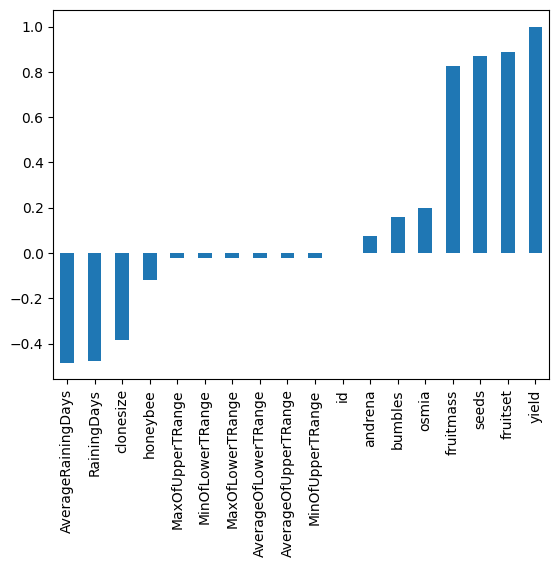

In [4]:
blueberry_df.corr()['yield'].sort_values().plot(kind='bar')

In [5]:
blueberry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

#### **Check the distribution of yield**

-0.29119496049488897


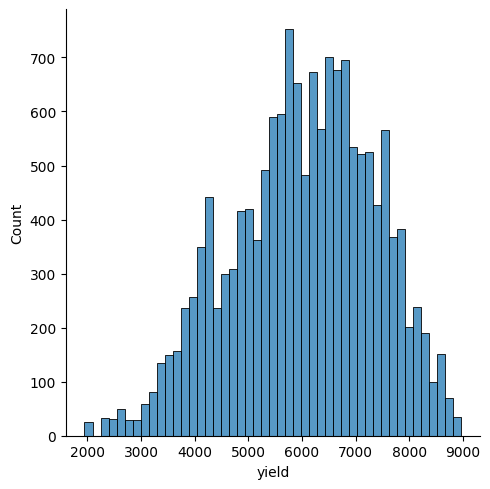

In [6]:
sns.displot(blueberry_df['yield'])
print(blueberry_df['yield'].skew())

#### **Small negative skew of the graph**

#### **Create a Parametergrid with values**

In [11]:
from sklearn.model_selection import train_test_split,ParameterGrid
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
KNeighbors = {'name':'KNeighborsClassifier',
             'estimator':KNeighborsRegressor(),
             'hyperparameters': {
                 'n_neighbors':range(1,20,2),
                 'weights':['distance','uniform'],
                 'algorithm':['ball_tree','kd_tree','brute'],
                 'p':[1,2]}
             }

LinearReg = {'name': 'LinearRegression',
             'estimator': LinearRegression(),
             'hyperparameters': {'fit_intercept': [True, False],
                                 'copy_X': [True, False],
                                 'positive': [True, False],
                                 'n_jobs': [-1, 1, 2, 4]}}
#Logistic = {'name':'LogisticRegression',
#            'estimator':LogisticRegression(max_iter=10000),
#            'hyperparameters':{
#                'solver': ["newton-cg", "lbfgs", "liblinear"]}
#           }
RandomForest = {'name':'RandomForest',
                'estimator':RandomForestRegressor(),
                'hyperparameters':{
                    "n_estimators": [4, 6, 9],
                    "criterion": ['absolute_error', 'squared_error', 'poisson', 'friedman_mse'],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]}
               }

model_list = [KNeighbors,LinearReg,RandomForest]

#features = df.drop('yield',axis=1).columns


#### **Create a function that takes in features and target, and create a dictionary with the best results**

In [19]:
def model_selection(model_list, df, features_col, target_col):
    features = df[features_col]
    target = df[target_col]
    # Split data into train/test
    X_train, X_test, y_train,y_test = train_test_split(features, target, test_size=0.3)
    # Hyperparameter optimization
    best_params_dict = {}
    for model in model_list:
        parameters = model['hyperparameters']
        best_score = 0
        for params in ParameterGrid(parameters):
            estimator = model['estimator'].set_params(**params)
            estimator.fit(X_train, y_train)  # Use `train` and `target_col` directly
            predictions = estimator.predict(X_test)
            fit_of_model = r2_score(predictions, y_test)
            if fit_of_model > best_score:
                best_score = fit_of_model
                rmse = mean_squared_error(predictions,y_test)
                best_params_dict[model['name']] = {'Best Score': fit_of_model,'RMSE':rmse, 'Best parameters': params}
    return best_params_dict


#### **lets sort the values based on correlation and then use them in the ML algorithms**

 - Loop through each index (and all the previous ones) of the columns with the largest correlation 

In [20]:
def choose_columns(model_list, dataframe,features_list, target):
    columns_dict = {}

    for i in range(1,len(features_list)):
        print(features_list[:i+1])
        columns_dict[i] = model_selection(model_list,dataframe,features_list[:i],target)

    return columns_dict

#Get the columns in a sorted fashion
corr_columns = [col for col in np.abs(blueberry_df.corr()['yield'].drop(['yield','id'])).sort_values(ascending = False).index]

test = choose_columns(model_list,blueberry_df,corr_columns,'yield')


['fruitset', 'seeds']
['fruitset', 'seeds', 'fruitmass']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize', 'osmia']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize', 'osmia', 'bumbles']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize', 'osmia', 'bumbles', 'honeybee']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize', 'osmia', 'bumbles', 'honeybee', 'andrena']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize', 'osmia', 'bumbles', 'honeybee', 'andrena', 'MaxOfUpperTRange']
['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize', 'osmia', 'bumbles', 'honeybee', 'andrena', 'MaxOfUpp

In [21]:
test

{1: {'KNeighborsClassifier': {'Best Score': 0.7340158252403813,
   'RMSE': 387086.5699666588,
   'Best parameters': {'algorithm': 'ball_tree',
    'n_neighbors': 13,
    'p': 1,
    'weights': 'uniform'}},
  'LinearRegression': {'Best Score': 0.7220740417639266,
   'RMSE': 386949.47812225856,
   'Best parameters': {'copy_X': True,
    'fit_intercept': True,
    'n_jobs': -1,
    'positive': False}}},
 2: {'KNeighborsClassifier': {'Best Score': 0.7635707173700391,
   'RMSE': 354969.97686744854,
   'Best parameters': {'algorithm': 'kd_tree',
    'n_neighbors': 11,
    'p': 2,
    'weights': 'uniform'}},
  'LinearRegression': {'Best Score': 0.7570087263825628,
   'RMSE': 346957.94580380525,
   'Best parameters': {'copy_X': True,
    'fit_intercept': True,
    'n_jobs': -1,
    'positive': False}}},
 3: {'KNeighborsClassifier': {'Best Score': 0.7361955920132524,
   'RMSE': 386304.34347750695,
   'Best parameters': {'algorithm': 'ball_tree',
    'n_neighbors': 19,
    'p': 2,
    'weights':